## Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random

##  Functions

In [22]:
def show_image(img):
    image = np.zeros((28, 28))
    for i in range(28):
        for j in range(28):
            image[i, j] = img[i * 28 + j]
    plt.imshow(image, 'gray')

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [24]:
def sigmoid_deriv(x): 
    s = sigmoid(x)
    return s * (1 - s)

In [25]:
def cost(actual_output, predicted_output):
    cost = 0
    for i in range(10):
        cost += (actual_output[i] - predicted_output[i]) ** 2
    return cost

## Reading The Train Set

In [26]:
train_images_file = open('dataset/train-images.idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('dataset/train-labels.idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    train_set.append((image, label))

## Reading The Test Set

In [27]:
test_images_file = open('dataset/t10k-images.idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('dataset/t10k-labels.idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256
    
    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1
    
    test_set.append((image, label))

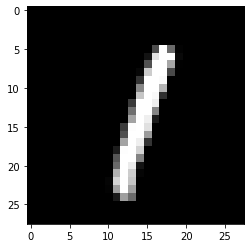

In [28]:
show_image(test_set[5][0])

## Weights and Biases Random Initialization

In [29]:
# layer 1
W1 = np.random.normal(0, 2 / 784, size=(16, 784))
b1 = np.zeros((16, 1))
    
# layer 2
W2 = np.random.normal(0, 2 / 16, size=(16, 16))
b2 = np.zeros((16, 1))

# layer 3
W3 = np.random.normal(0, 2 / 16, size=(10, 16))
b3 = np.zeros((10, 1))

## Hyperparameters

In [30]:
num_samples = len(train_set)
batch_size = 50
num_epochs = 5
alpha = 1

## Training The Neural Network

In [31]:
avg_costs = []

for epoch in range(num_epochs):
    
    print('epoch number:', epoch)
    
    # shuffling the train set
    random.shuffle(train_set)
    
    sum_cost = 0
    
    for batch_number in range(num_samples // batch_size):
        
        # gradients
        grad_W3 = np.zeros((10, 16))
        grad_b3 = np.zeros((10, 1))

        grad_W2 = np.zeros((16, 16))
        grad_b2 = np.zeros((16, 1))

        grad_W1 = np.zeros((16, 784))
        grad_b1 = np.zeros((16, 1))
        
        for image_index in range(batch_number * batch_size, (batch_number + 1) * batch_size):
        
            # neurons
            a0 = train_set[image_index][0]
            a1 = np.zeros((1, 16))
            a2 = np.zeros((1, 16))
            a3 = np.zeros((1, 10))

            # labels
            y = train_set[image_index][1]

            # forward phase
            z1 = W1 @ a0 + b1
            a1 = sigmoid(z1)
            z2 = W2 @ a1 + b2
            a2 = sigmoid(z2)
            z3 = W3 @ a2 + b3
            a3 = sigmoid(z3)

            sum_cost += cost(a3, y)

    
            # backpropagation

            # layer 3
            grad_W3 += (2 * sigmoid_deriv(z3) * (a3 - y)) @ (np.transpose(a2))
            grad_b3 += 2 * sigmoid_deriv(z3) * (a3 - y)
            grad_a2 = np.transpose(W3) @ (2 * sigmoid_deriv(z3) * (a3 - y))

            # layer 2
            grad_W2 += (sigmoid_deriv(z2) * grad_a2) @ (np.transpose(a1))
            grad_b2 += sigmoid_deriv(z2) * grad_a2
            grad_a1 = np.transpose(W2) @ (sigmoid_deriv(z2) * grad_a2)

            # layer 1
            grad_W1 += (sigmoid_deriv(z1) * grad_a1) @ (np.transpose(a0))
            grad_b1 += sigmoid_deriv(z1) * grad_a1

    
        # updating weights and biases
        W3 = W3 - alpha * (grad_W3 / batch_size)
        b3 = b3 - alpha * (grad_b3 / batch_size)
        W2 = W2 - alpha * (grad_W2 / batch_size)
        b2 = b2 - alpha * (grad_b2 / batch_size)
        W1 = W1 - alpha * (grad_W1 / batch_size)
        b1 = b1 - alpha * (grad_b1 / batch_size)

    # recording average cost in the current step
    avg_costs.append(sum_cost / num_samples)

epoch number: 0
epoch number: 1
epoch number: 2
epoch number: 3
epoch number: 4


## Average Cost Over Time

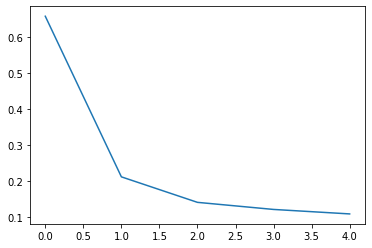

In [32]:
plt.plot([i for i in range(len(avg_costs))], avg_costs)
plt.show()

## Evaluating The Network on the Train Set

In [33]:
true_predictions = 0

for i in range(num_samples):
    a0 = train_set[i][0]
    z1 = W1 @ a0 + b1
    a1 = sigmoid(z1)
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    z3 = W3 @ a2 + b3
    a3 = sigmoid(z3)
    
    actual_value = -1
    for j in range(10):
        if (train_set[i][1])[j] == 1:
            actual_value = j
            break
            
    predicted_value = 0
    for j in range(1, 10):
        if a3[j, 0] > a3[predicted_value, 0]:
            predicted_value = j
    
    if predicted_value == actual_value:
        true_predictions += 1
    
succes_rate = true_predictions / num_of_train_images
print(f'Success Rate = {true_predictions}/{num_of_train_images} = {succes_rate}')

Success Rate = 56251/60000 = 0.9375166666666667


## Evaluating The Network on the Test Set

In [34]:
true_predictions = 0

for i in range(num_of_test_images):
    a0 = test_set[i][0] 
    z1 = W1 @ a0 + b1
    a1 = sigmoid(z1)
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    z3 = W3 @ a2 + b3
    a3 = sigmoid(z3)
    
    actual_value = -1
    for j in range(10):
        if (test_set[i][1])[j] == 1:
            actual_value = j
            break
            
    predicted_value = 0
    for j in range(1, 10):
        if a3[j, 0] > a3[predicted_value, 0]:
            predicted_value = j
        
    if predicted_value == actual_value:
        true_predictions += 1
    
succes_rate = true_predictions / num_of_test_images
print(f'Success Rate = {true_predictions}/{num_of_test_images} = {succes_rate}')

Success Rate = 9294/10000 = 0.9294
